In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
data = pd.read_csv('customer_data_records.csv')

print(data.head())

print(data.isnull().sum())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90
CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

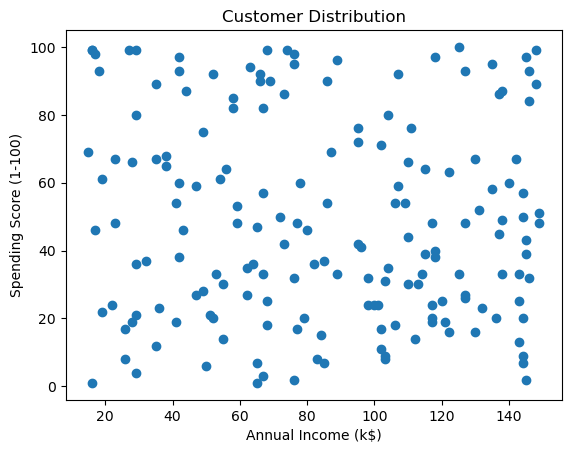

In [5]:
# visualisation

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

In [10]:

kmeans = cluster.KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

c:\Users\HP ELITEBOOK 840 G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


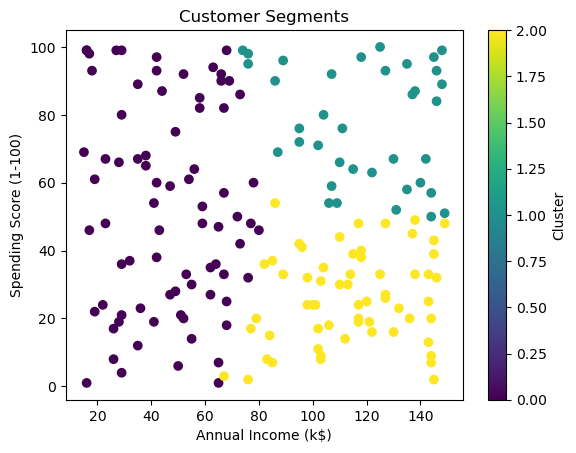

In [8]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
            c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\HP ELITEBOOK 840 G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP ELITEBOOK 840 G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP ELITEBOOK 840 G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP ELITEBOOK 840 G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

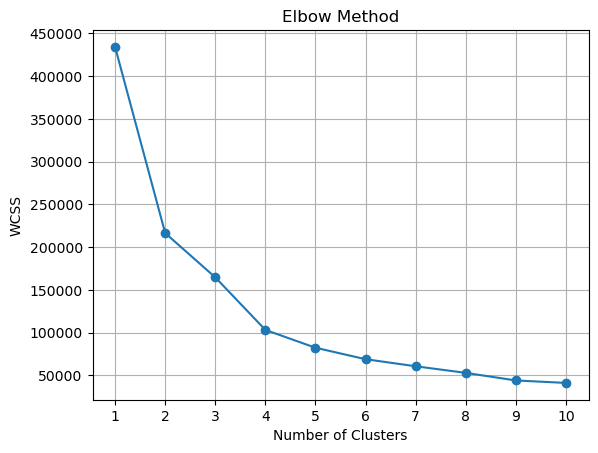

In [11]:
# elbow method

wcss = []

# values of k from 1 to 10
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [12]:
# KMeans with 5 clusters
kmeans = cluster.KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

c:\Users\HP ELITEBOOK 840 G5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


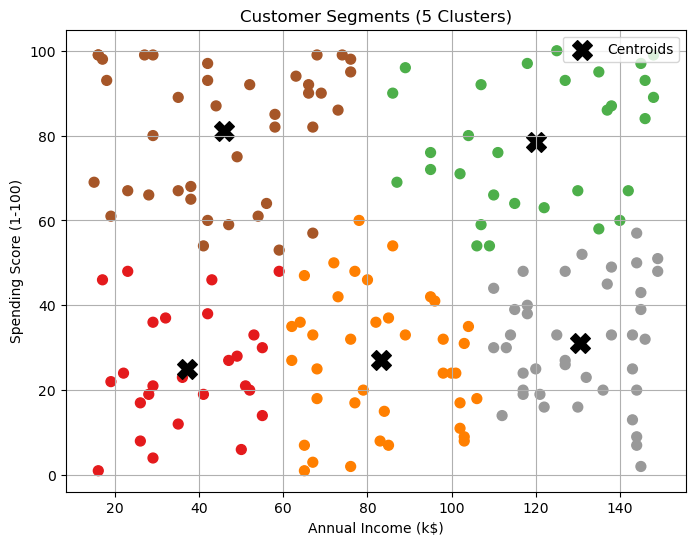

In [13]:
# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
            c=data['Cluster'], cmap='Set1', s=50)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='black', marker='X', s=200, label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (5 Clusters)')
plt.legend()
plt.grid(True)
plt.show()